In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading train dataset

In [2]:
df1 = pd.read_csv('blackFriday_train.csv')



In [3]:
df1.shape

(550068, 12)

In [4]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


# Dropping unnecessary fields from the dataset.

In [7]:
df1.drop(['User_ID'], axis=1, inplace = True)

In [8]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Converting categorical data into integer ones by using mapping function.

In [9]:
df1['Gender'] = df1['Gender'].map({'F':0, 'M':1})
df1['Gender'].head() 

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

# Visualizing the unique values of the particular field.

In [10]:
df1.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df1['Age'] = df1['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [12]:
df1['Age'].head()

0    1
1    1
2    1
3    1
4    7
Name: Age, dtype: int64

In [13]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


# Creating dummies for the categorical data.

In [14]:
# city = pd.get_dummies(df1['City_Category'], drop_first=True)
city = pd.get_dummies(df1['City_Category'])
city

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
550063,0,1,0
550064,0,0,1
550065,0,1,0
550066,0,0,1


# Concatinaing dummy variable with original dataset.

In [15]:
df1 = pd.concat([df1, city], axis=1)

In [16]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,0,1


In [17]:
df1['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:
df1.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
A                                  0
B                                  0
C                                  0
dtype: int64

In [19]:
df1.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [20]:
df1.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df1.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [22]:
df1.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

# Renaming the columns.

In [23]:
df1.rename(columns={'Product_Category_1':'cat1', 'Product_Category_2':'cat2', 'Product_Category_3':'cat3'}, inplace = True)

In [24]:
df1.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'A', 'B', 'C'],
      dtype='object')

# Replacing the value by using str method

In [25]:
df1['Stay_In_Current_City_Years'] = df1.Stay_In_Current_City_Years.str.replace('+', '')

In [26]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,7,16,C,4,0,8,NaN,NaN,7969,0,0,1


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   cat1                        550068 non-null  int64  
 8   cat2                        376430 non-null  float64
 9   cat3                        166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  A                           550068 non-null  uint8  
 12  B                           550068 non-null  uint8  
 13  C             

# Converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [28]:
df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].astype(int)

In [29]:
df1['A'] = df1['A'].astype(int)
df1['B'] = df1['B'].astype(int)
df1['C'] = df1['C'].astype(int)
                          

# Visualizing Age Vs Purchased.

C:\Users\Ashish\Anaconda3\envs\py377\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

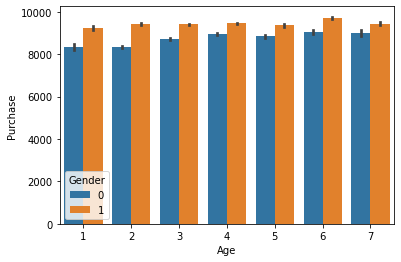

In [30]:
# Age: categorical data(independent variable)
# Purchase: Continuous data(dependent varibale)
# Gender: Categorical data(2 categories)

# Two categorical data and one continuous data, we can plot bar graph

sns.barplot('Age', 'Purchase', hue='Gender', data = df1)

Purchasing of goods of each range of age are almost equal. We can conclude that the percentage of purchasing goods of men over women is higher.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

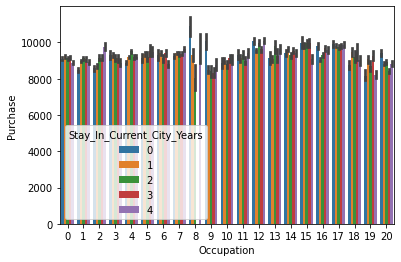

In [32]:
sns.barplot('Occupation', 'Purchase', hue= 'Stay_In_Current_City_Years', data = df1)

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

# Visualizing product_category1 Vs Purchased

C:\Users\Ashish\Anaconda3\envs\py377\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cat1', ylabel='Purchase'>

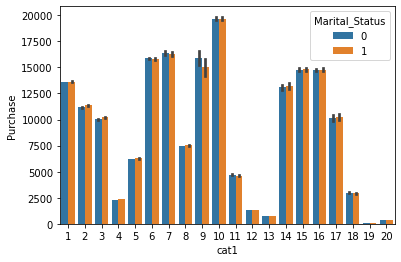

In [33]:
sns.barplot('cat1', 'Purchase', hue= 'Marital_Status', data = df1)

# Visualizing Product_category Vs Purchased

<AxesSubplot:xlabel='cat2', ylabel='Purchase'>

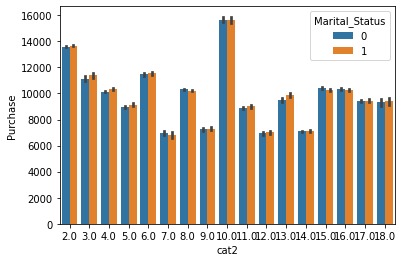

In [35]:
sns.barplot('cat2', 'Purchase', hue='Marital_Status', data = df1)

# Visualizing Product_category3 Vs Purchased

C:\Users\Ashish\Anaconda3\envs\py377\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cat3', ylabel='Purchase'>

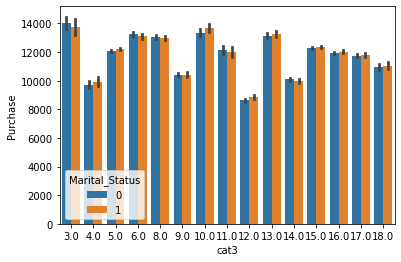

In [36]:
sns.barplot('cat3', 'Purchase', hue = 'Marital_Status', data = df1)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.

Product cat3 is much more purchased by people than product cat2 and product cat1.